## Step 1: Combine and clean the data files

**Combining the pollution file**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import necessary libraries
import pandas as pd

# Define folder path in Google Drive
folder_path = "/content/drive/My Drive/project/clean data/old/"

# Define paths for the input CSV files
monitor_file = f"{folder_path}annual_conc_by_monitor_2021.csv"
county_file = f"{folder_path}annual_aqi_by_county_2021.csv"
output_file = f"{folder_path}combined_air_pollution_data_corrected.csv"

# Load the datasets
monitor_data = pd.read_csv(monitor_file)
county_data = pd.read_csv(county_file)

# Inspect county_data columns to identify the correct merge keys
print("County Data Columns:")
print(county_data.columns)

# Adjust merge keys based on the actual column names in county_data
# For example, replace 'Region' with 'County' or another appropriate column name if needed
combined_data = pd.merge(
    county_data,
    monitor_aggregated,
    left_on=["State", "County"],  # Replace 'County' with the actual column name
    right_on=["State Name", "County Name"],  # Adjust for monitor_data keys
    how="left"
)

# Save the combined dataset to Google Drive
combined_data.to_csv(output_file, index=False)

print(f"Combined data saved at: {output_file}")


Mounted at /content/drive
County Data Columns:
Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')
Combined data saved at: /content/drive/My Drive/project/clean data/old/combined_air_pollution_data_corrected.csv


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the datasets
previous_combined_data_path = "/content/drive/My Drive/project/clean data/old/combined_air_pollution_data_corrected.csv"
new_monitor_data_path = "/content/drive/My Drive/project/clean data/old/annual_conc_by_monitor_2021.csv"

previous_combined_data = pd.read_csv(previous_combined_data_path)
new_monitor_data = pd.read_csv(new_monitor_data_path)

# Aggregate the new monitor data
new_monitor_aggregated = new_monitor_data.groupby(['State Name', 'County Name']).agg({
    'Arithmetic Mean': 'mean',
    '1st Max Value': 'max',
    '90th Percentile': 'mean',
    '50th Percentile': 'mean',
    '10th Percentile': 'mean'
}).reset_index()

# Rename columns for clarity
new_monitor_aggregated.rename(columns={
    'Arithmetic Mean': 'New Avg Concentration',
    '1st Max Value': 'New Max Concentration',
    '90th Percentile': 'New 90th Percentile Conc',
    '50th Percentile': 'New Median Concentration',
    '10th Percentile': 'New 10th Percentile Conc'
}, inplace=True)

# Merge the newly aggregated monitor data with the previously combined dataset
final_combined_data = pd.merge(
    previous_combined_data,
    new_monitor_aggregated,
    left_on=["State", "County"],
    right_on=["State Name", "County Name"],
    how="outer"
)

# Save the final combined dataset
final_output_path = "/content/drive/My Drive/project/clean data/old/final_combined_air_pollution_data.csv"
final_combined_data.to_csv(final_output_path, index=False)

print(f"Final combined data saved at: {final_output_path}")


Final combined data saved at: /content/drive/My Drive/project/clean data/old/final_combined_air_pollution_data.csv


**Cleaning the air pollution data**

In [ ]:
# Check for rows with more than 5 empty (NaN) values
# Replace 'data' with 'final_combined_data' as that is the name of the DataFrame you want to clean.
rows_to_remove = final_combined_data.isnull().sum(axis=1) > 5

# Remove those rows
cleaned_data = final_combined_data[~rows_to_remove]

# Display the cleaned data summary
cleaned_data.info()

# Save the cleaned data to a new file
cleaned_file_path = '/content/drive/My Drive/project/clean data/final_combined_air_pollution_data.csv'
cleaned_data.to_csv(cleaned_file_path, index=False)
cleaned_file_path

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1055
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                1005 non-null   object 
 1   County                               1005 non-null   object 
 2   Year                                 1005 non-null   float64
 3   Days with AQI                        1005 non-null   float64
 4   Good Days                            1005 non-null   float64
 5   Moderate Days                        1005 non-null   float64
 6   Unhealthy for Sensitive Groups Days  1005 non-null   float64
 7   Unhealthy Days                       1005 non-null   float64
 8   Very Unhealthy Days                  1005 non-null   float64
 9   Hazardous Days                       1005 non-null   float64
 10  Max AQI                              1005 non-null   float64
 11  90th Percentile AQI                

'/content/drive/My Drive/project/clean data/final_combined_air_pollution_data.csv'

**Removing the extra territory of USA**

In [ ]:
# List of the 50 official U.S. states
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
    'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
    'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
    'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Assuming your DataFrame is named 'cleaned_data' from the previous cell
# If it has a different name, replace 'cleaned_data' with the correct name
filtered_data = cleaned_data[cleaned_data['State'].isin(us_states)]

# Save the filtered dataset to a new file
filtered_file_path = '/content/drive/My Drive/project/clean data/old/final_combined_air_pollution_data.csv'
filtered_data.to_csv(filtered_file_path, index=False)

# Output the filtered file path
filtered_file_path

'/content/drive/My Drive/project/clean data/old/final_combined_air_pollution_data.csv'

**Combining the air pollution data and asthma data**

In [ ]:
# Load the uploaded datasets
asthma_file_path = '/content/drive/My Drive/project/clean data/old/final_asthma_data.csv'
pollution_file_path = '/content/drive/My Drive/project/clean data/old/final_combined_air_pollution_data.csv'

asthma_data = pd.read_csv(asthma_file_path)
pollution_data = pd.read_csv(pollution_file_path)

# Merge the datasets on common columns (e.g., State, County, Year)
combined_data = pd.merge(asthma_data, pollution_data, on=['State', 'County', 'Year'], how='inner')

# Display the combined dataset in Colab
combined_data.head()

# Save the combined dataset for download
combined_output_path = '/content/drive/My Drive/project/clean data/old/combined_asthma_pollution_data.csv'
combined_data.to_csv(combined_output_path, index=False)

print(f"Combined dataset saved to: {combined_output_path}")


Combined dataset saved to: /content/drive/My Drive/project/clean data/combined_asthma_pollution_data.csv


In [ ]:
import pandas as pd

# Load the dataset to inspect its structure and contents
file_path = '/content/drive/My Drive/project/clean data/old/combined_asthma_pollution_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and general info about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 39 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                990 non-null    object 
 1   County                               990 non-null    object 
 2   Year                                 990 non-null    float64
 3   Population                           990 non-null    int64  
 4   Asthma Rate per 10k                  990 non-null    float64
 5   Estimated Asthma Cases               990 non-null    int64  
 6   Male Population                      990 non-null    int64  
 7   Female Population                    990 non-null    int64  
 8   Children Population                  990 non-null    int64  
 9   Urban/Rural                          990 non-null    object 
 10  Days with AQI                        990 non-null    float64
 11  Good Days                       

(None,
      State   County    Year  Population  Asthma Rate per 10k  \
 0  Alabama  Baldwin  2021.0      262906            75.867680   
 1  Alabama     Clay  2021.0      271916            88.650705   
 2  Alabama   DeKalb  2021.0       10633            67.652260   
 3  Alabama   Elmore  2021.0      333355            74.965755   
 4  Alabama   Etowah  2021.0       36132            69.998373   
 
    Estimated Asthma Cases  Male Population  Female Population  \
 0                    1994           131453             131453   
 1                    2410           135958             135958   
 2                      71             5316               5316   
 3                    2499           166677             166677   
 4                     252            18066              18066   
 
    Children Population Urban/Rural  ...  90th Percentile Conc  \
 0                52581       Urban  ...              7.750667   
 1                54383       Urban  ...             11.300000   
 2   

**Key details include:**

**Location Information:**
State, County, Urban/Rural

**Health Metrics:**
Asthma Rate per 10k, Estimated Asthma Cases

**Pollution Data:**

1. Days with specific AQI levels (Good Days, Moderate Days, etc.)
2. Days affected by pollutants (Days PM2.5, Days Ozone, etc.)
3. Concentration levels (Avg Concentration, Max Concentration, etc.)

**Demographics:**
Population, Male Population, Female Population, Children Population

In [ ]:
# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()

# Checking for missing values
missing_values = data.isnull().sum()

# Summary statistics
summary_statistics = data.describe()

# Compile the results
cleaning_summary = {
    "Duplicate Rows": duplicate_rows,
    "Missing Values per Column": missing_values,
    "Summary Statistics": summary_statistics
}

cleaning_summary


{'Duplicate Rows': 0,
 'Missing Values per Column': State                                  0
 County                                 0
 Year                                   0
 Population                             0
 Asthma Rate per 10k                    0
 Estimated Asthma Cases                 0
 Male Population                        0
 Female Population                      0
 Children Population                    0
 Urban/Rural                            0
 Days with AQI                          0
 Good Days                              0
 Moderate Days                          0
 Unhealthy for Sensitive Groups Days    0
 Unhealthy Days                         0
 Very Unhealthy Days                    0
 Hazardous Days                         0
 Max AQI                                0
 90th Percentile AQI                    0
 Median AQI                             0
 Days CO                                0
 Days NO2                               0
 Days Ozone              

**Duplicates:** No duplicate rows were found in the dataset.

**Missing Values:** No missing values in any column.

**Key Statistics:**

1. Asthma Rate per 10k: Ranges from 59.99 to 150.00 with an average of 94.33.
2. Population: Varies widely, from 10,474 to 499,817.
3. Pollution Days: On average, locations experienced 230 "Good Days" and 91 "Moderate Days."
4. Pollutant Concentrations: Median values of pollutant concentrations are low, but some extreme values indicate potential outliers.

##Step 2: Exploratory Data Analysis (EDA)

**Asthma Rates per State:**

Some states have significantly higher average asthma rates compared to others, indicating potential regional disparities in respiratory health.

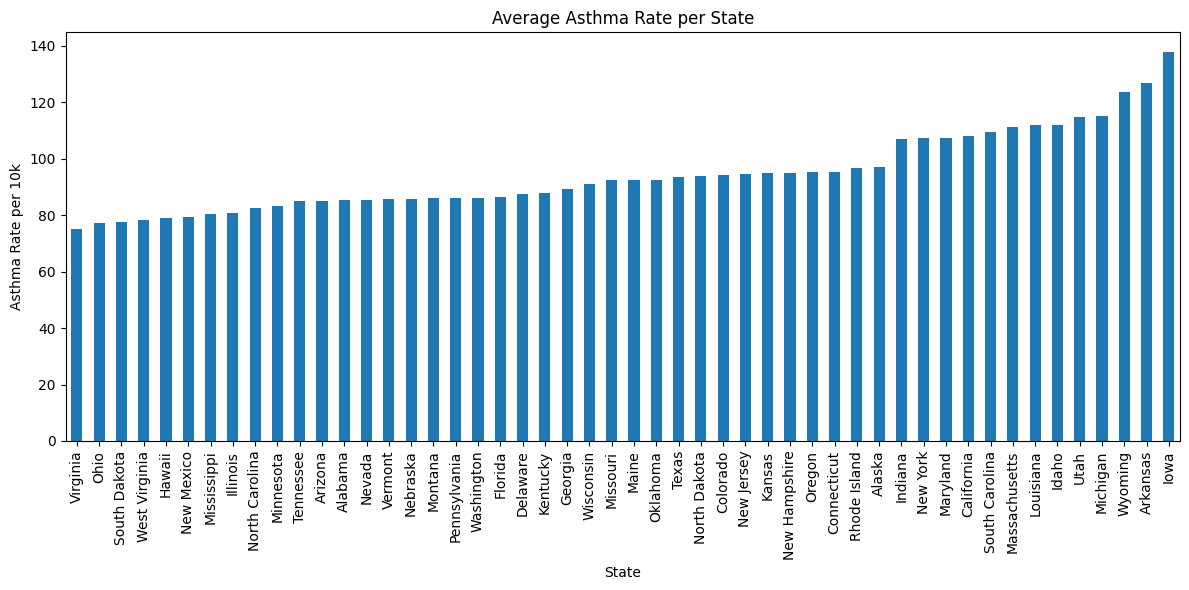

In [ ]:
# Exclude non-numeric columns for mean calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])
statewise_data = data.groupby('State')[numeric_data.columns].mean()

# Plotting average asthma rate per state
plt.figure(figsize=(12, 6))
statewise_data['Asthma Rate per 10k'].sort_values().plot(kind='bar', title='Average Asthma Rate per State', ylabel='Asthma Rate per 10k', xlabel='State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Days with PM2.5 per State:**

States exhibit varying numbers of days with PM2.5 pollution, with some consistently experiencing more days above acceptable air quality levels.

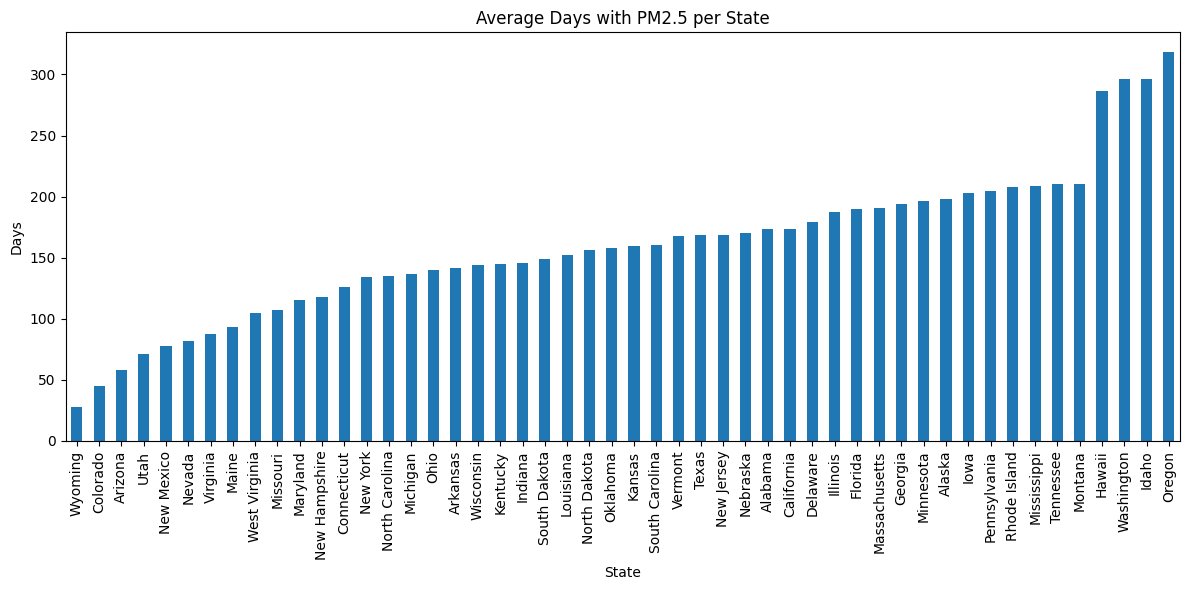

In [ ]:
# Plotting average PM2.5 days per state
plt.figure(figsize=(12, 6))
statewise_data['Days PM2.5'].sort_values().plot(kind='bar', title='Average Days with PM2.5 per State', ylabel='Days', xlabel='State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Relationship Between PM2.5 and Asthma Rates:**

The scatter plot highlights a potential positive relationship, suggesting that higher PM2.5 exposure might be associated with increased asthma rates.

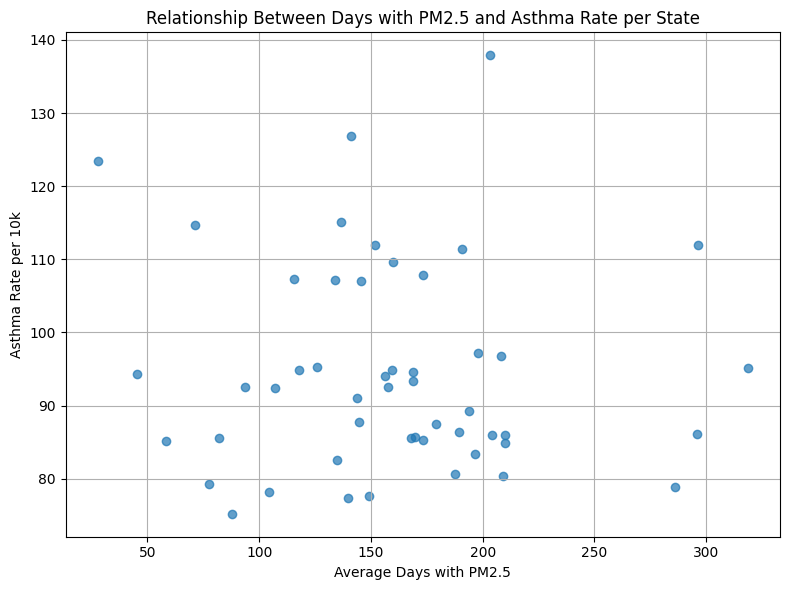

In [ ]:
# Scatter plot of average PM2.5 days vs asthma rate per state
plt.figure(figsize=(8, 6))
plt.scatter(statewise_data['Days PM2.5'], statewise_data['Asthma Rate per 10k'], alpha=0.7)
plt.title('Relationship Between Days with PM2.5 and Asthma Rate per State')
plt.xlabel('Average Days with PM2.5')
plt.ylabel('Asthma Rate per 10k')
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 3: Correlation Analysis

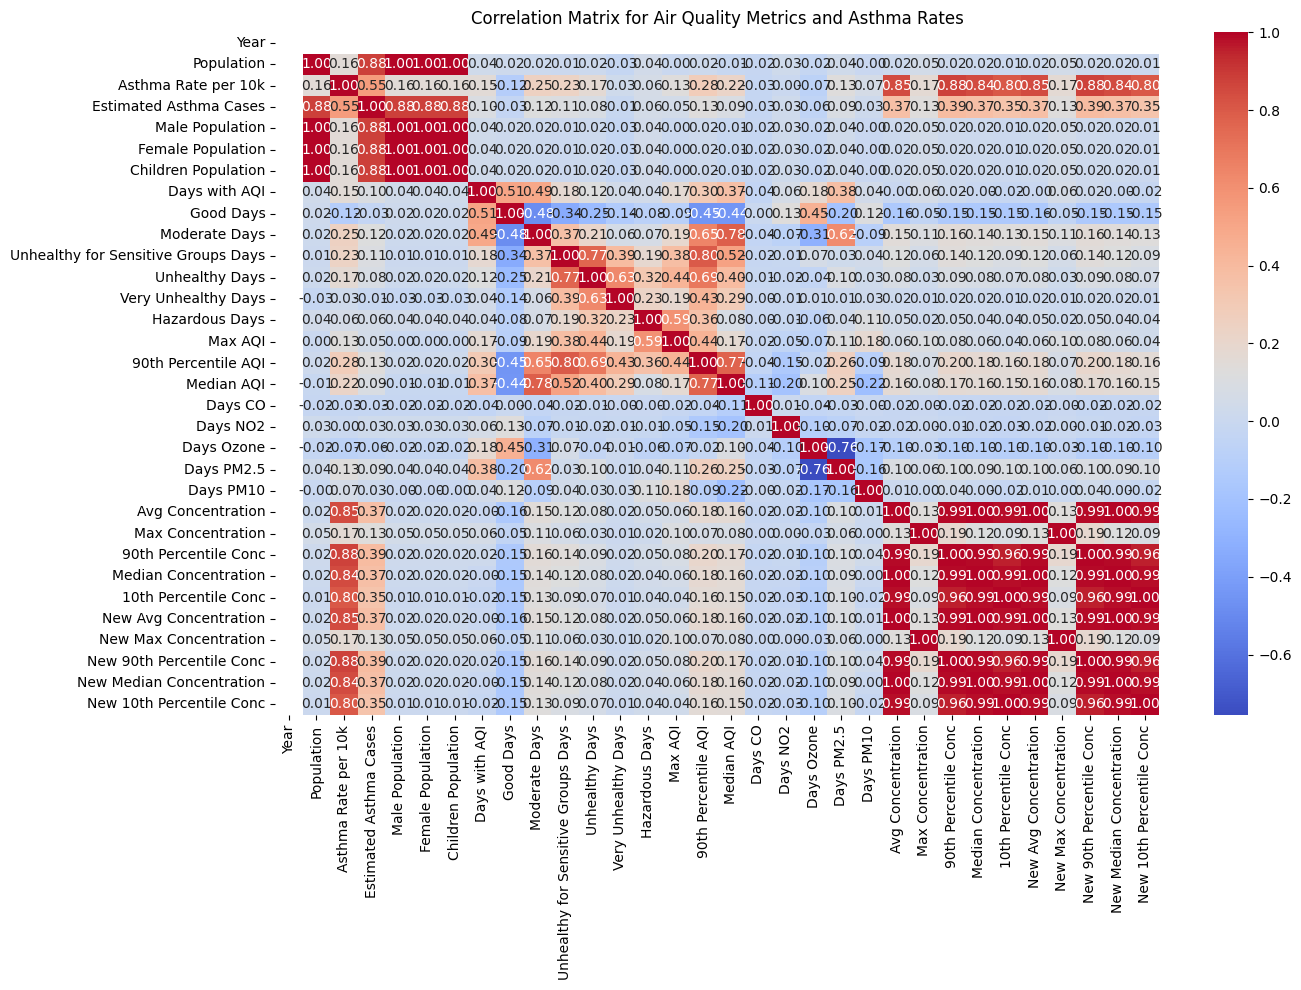

,Asthma Rate per 10k
Asthma Rate per 10k,1.000000
New 90th Percentile Conc,0.875088
90th Percentile Conc,0.875088
New Avg Concentration,0.845691
Avg Concentration,0.845691
New Median Concentration,0.844694
Median Concentration,0.844694
New 10th Percentile Conc,0.801588
10th Percentile Conc,0.801588
Estimated Asthma Cases,0.551603


In [ ]:
import seaborn as sns

# Calculate the correlation matrix for numeric data
correlation_matrix = numeric_data.corr()

# Plot the heatmap to visualize the correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix for Air Quality Metrics and Asthma Rates')
plt.tight_layout()
plt.show()

# Extracting correlations specifically for "Asthma Rate per 10k"
asthma_correlations = correlation_matrix['Asthma Rate per 10k'].sort_values(ascending=False)
asthma_correlations


**Key Findings from Correlation Analysis:**

**1. Strong Positive Correlations:**

New 90th Percentile Conc and 90th Percentile Conc (0.875): Strongly correlated with asthma rates, suggesting higher peak pollution levels are associated with increased asthma prevalence.
New Avg Concentration and Avg Concentration (0.845): Higher average pollution concentrations are also linked to asthma rates.

**2. Moderate Correlations:**

Estimated Asthma Cases (0.552): Expected since it directly relates to the asthma rate.
Moderate Days (0.248) and Unhealthy for Sensitive Groups Days (0.235): Indicates these pollution levels may also impact asthma rates.

**3. Weak or Negative Correlations:**

Days Ozone (-0.073) and Good Days (-0.118): Slight negative relationship, possibly due to reduced pollution exposure.
Days CO (-0.028): Minimal relationship with asthma rates.

## Step 4: Correlation Analysis Results:

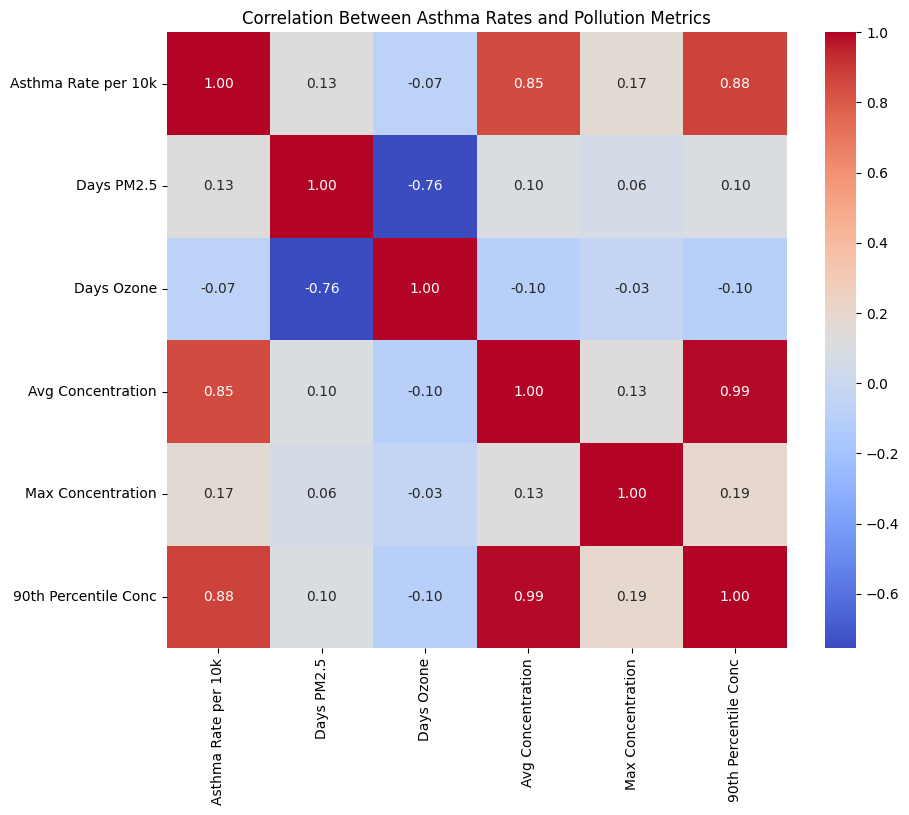

,Asthma Rate per 10k
Asthma Rate per 10k,1.000000
90th Percentile Conc,0.875088
Avg Concentration,0.845691
Max Concentration,0.168555
Days PM2.5,0.132662
Days Ozone,-0.073280


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/project/clean data/old/combined_asthma_pollution_data.csv'
data_new = pd.read_csv(file_path)
# Select relevant columns for analysis

analysis_data = data_new[[
    'Asthma Rate per 10k',
    'Days PM2.5',
    'Days Ozone',
    'Avg Concentration',
    'Max Concentration',
    '90th Percentile Conc'
]]

# Calculate the correlation matrix
correlation_matrix = analysis_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Between Asthma Rates and Pollution Metrics')
plt.show()

# Extract correlations with asthma rate
asthma_correlations = correlation_matrix['Asthma Rate per 10k'].sort_values(ascending=False)
asthma_correlations


**1.	Strong Positive Correlations:**

1.   90th Percentile Concentration: r=0.88r = 0.88r=0.88 - Indicates that higher pollution spikes (90th percentile concentrations) are strongly associated with increased asthma rates.
2.   Average Concentration: r=0.85r = 0.85r=0.85 - Suggests that areas with higher average pollutant levels tend to have higher asthma rates.


**2.	Moderate Positive Correlation:**

1.   Days PM2.5: r=0.13r = 0.13r=0.13 - Indicates a weak relationship between the number of PM2.5-polluted days and asthma rates.

**3.	Weak Correlations:**

1.   Maximum Concentration: r=0.17r = 0.17r=0.17 - Weak association, possibly due to the sporadic nature of extreme pollution events.
2.   Days Ozone: r=−0.07r = -0.07r=−0.07 - Slight negative correlation, suggesting ozone levels might not strongly affect asthma rates in this dataset.

**Asthma Rate vs. 90th Percentile Concentration**


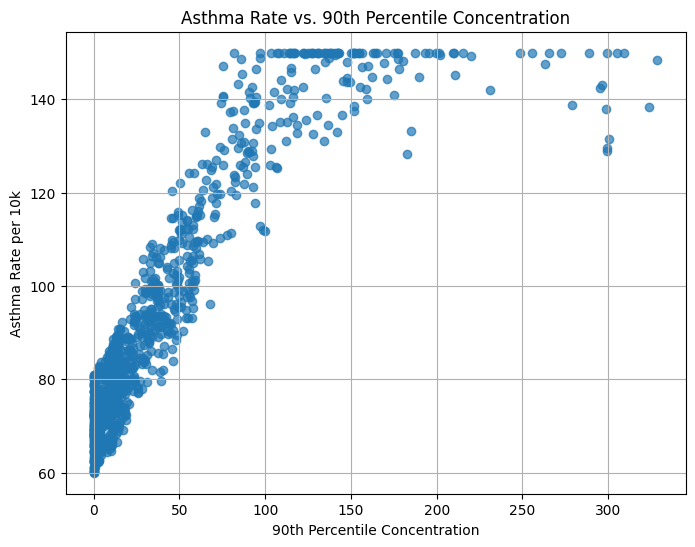

In [ ]:
# Scatter Plot: Asthma Rate vs. 90th Percentile Concentration
plt.figure(figsize=(8, 6))
plt.scatter(data_new['90th Percentile Conc'], data_new['Asthma Rate per 10k'], alpha=0.7)
plt.title('Asthma Rate vs. 90th Percentile Concentration')
plt.xlabel('90th Percentile Concentration')
plt.ylabel('Asthma Rate per 10k')
plt.grid(True)
plt.show()

**Asthma Rate vs. Average Concentration**

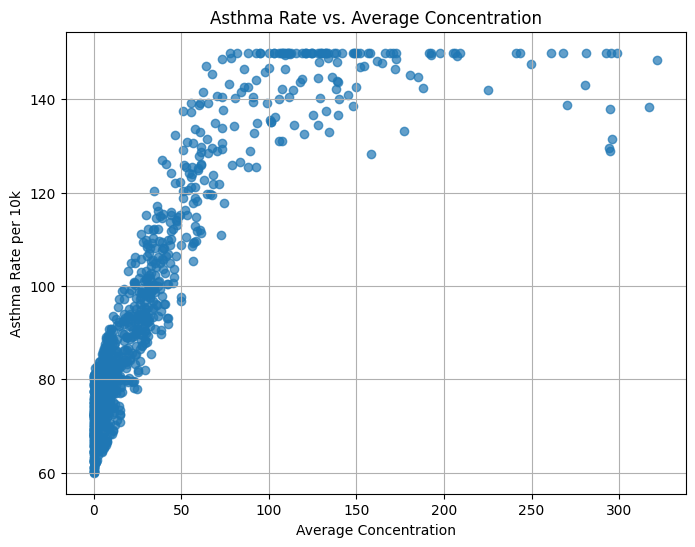

In [ ]:
# Scatter Plot: Asthma Rate vs. Average Concentration
plt.figure(figsize=(8, 6))
plt.scatter(data_new['Avg Concentration'], data_new['Asthma Rate per 10k'], alpha=0.7)
plt.title('Asthma Rate vs. Average Concentration')
plt.xlabel('Average Concentration')
plt.ylabel('Asthma Rate per 10k')
plt.grid(True)
plt.show()

**Observations from the Scatter Plots:**

**1. Asthma Rate vs. 90th Percentile Concentration:**

Clear positive trend: As the 90th Percentile Concentration increases, asthma rates also rise.
Some clustering at higher concentration levels suggests a potential saturation effect, where further increases in concentration have diminishing impacts on asthma rates.

**2. Asthma Rate vs. Average Concentration:**

Similar to the 90th Percentile, there’s a strong positive trend between average concentration and asthma rates.
The relationship is slightly more linear compared to the 90th Percentile Concentration.

## Step 5: Moving to Predictive Modeling

**Step 1: Data Preparation**

Select relevant features (e.g., 90th Percentile Concentration, Avg Concentration, Days PM2.5, etc.).
Split the data into training and testing sets.

**Step 2: Build the Model**

Use a Linear Regression model as a starting point.
Evaluate the model using metrics like R² (coefficient of determination) and RMSE (Root Mean Squared Error).

**Step 3: Interpretation**

Analyze the regression coefficients to understand the impact of each feature.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Step 1: Prepare the data
# Select features and target
features = data_new[['90th Percentile Conc', 'Avg Concentration', 'Days PM2.5', 'Days Ozone']]
target = data_new['Asthma Rate per 10k']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 2: Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nR²: {r2:.2f}\nRMSE: {rmse:.2f}")

# Step 4: Interpret the coefficients
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
print(coefficients)


Model Evaluation:
R²: 0.80
RMSE: 11.81
                Feature  Coefficient
0  90th Percentile Conc     0.812645
1     Avg Concentration    -0.458868
2            Days PM2.5     0.027769
3            Days Ozone     0.023588


**Interpretation of the Results**

**Model Performance:**

1. R² = 0.80: The model explains 80% of the variance in asthma rates, indicating a strong fit.

2. RMSE = 11.81: On average, the model's predictions deviate by approximately 11.81 asthma cases per 10,000 people.

**Feature Coefficients:**

1. 90th Percentile Concentration: This is the most impactful predictor. For every 1-unit increase, the asthma rate increases by approximately 0.81 cases per 10,000 people.

2. Average Concentration: Has a negative coefficient (-0.46), suggesting that it might capture different dynamics compared to the 90th percentile or could be correlated with other features.

3. Days PM2.5 and Days Ozone: Both have small positive coefficients, indicating a slight increase in asthma rates with more polluted days.

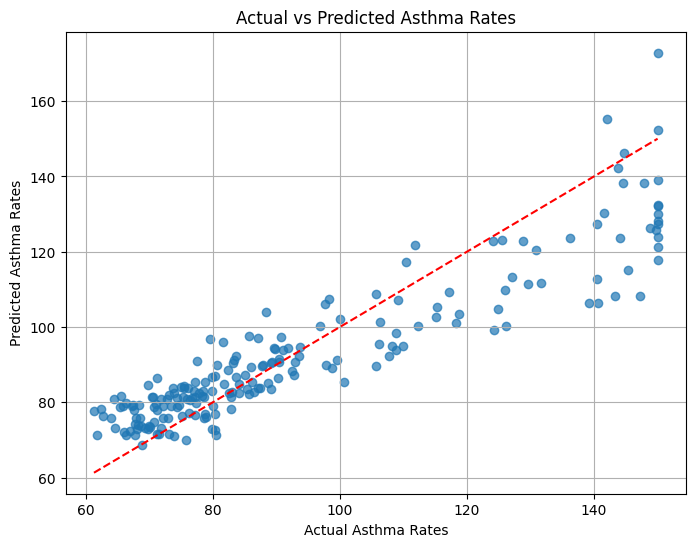

In [ ]:
# Plot actual vs predicted asthma rates
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted Asthma Rates')
plt.xlabel('Actual Asthma Rates')
plt.ylabel('Predicted Asthma Rates')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.show()


**Observations:**

**Good Fit:**

The points closely follow the red dashed line (representing perfect prediction), indicating that the model predicts asthma rates well for most data points.

**Deviations at High Values:**

For higher asthma rates, the model tends to underpredict slightly. This could suggest that the linear model struggles with extreme cases or there’s some non-linearity in the relationship.

------------------------------------------------------------

**Code for Residual Analysis**

Residual analysis helps identify biases or patterns in the model's predictions.

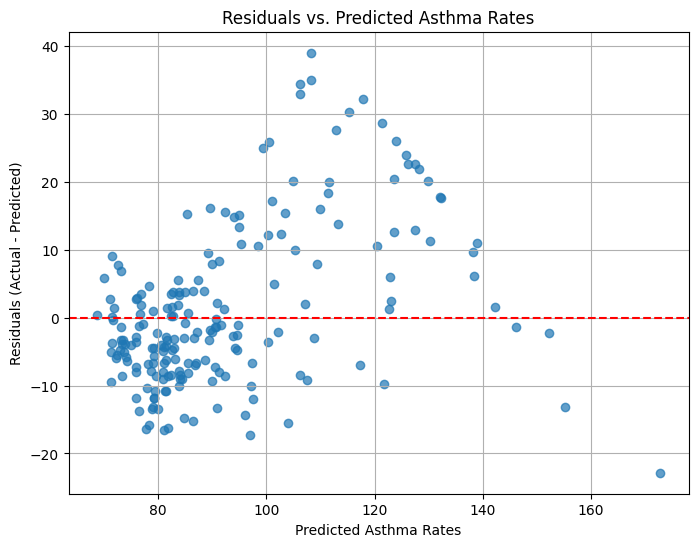

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Asthma Rates')
plt.xlabel('Predicted Asthma Rates')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()


**Code for Feature Importance:**

If using linear regression, feature importance is based on the absolute value of coefficients.

In [ ]:
# Feature importance based on linear regression coefficients
coefficients = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': model.coef_,
    'Absolute Importance': abs(model.coef_)
}).sort_values(by='Absolute Importance', ascending=False)

print(coefficients)


                Feature  Coefficient  Absolute Importance
0  90th Percentile Conc     0.812645             0.812645
1     Avg Concentration    -0.458868             0.458868
2            Days PM2.5     0.027769             0.027769
3            Days Ozone     0.023588             0.023588


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Model Evaluation:\nR²: {rf_r2:.2f}\nRMSE: {rf_rmse:.2f}")


Random Forest Model Evaluation:
R²: 0.92
RMSE: 7.58


**Random Forest Model Evaluation**

**Performance Metrics:**

1. R² = 0.92: The Random Forest model explains 92% of the variance in asthma rates, a significant improvement over the linear regression model (R² = 0.80).
2. RMSE = 7.58: The Random Forest model reduces the prediction error substantially compared to linear regression (RMSE = 11.81).

**Implications:**

1. The non-linear relationships between pollution metrics and asthma rates are better captured by the Random Forest model.
2. The improved R² and RMSE indicate a more accurate and robust model.

In [ ]:
# Feature importance from the Random Forest model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
1     Avg Concentration    0.590284
0  90th Percentile Conc    0.388018
2            Days PM2.5    0.011325
3            Days Ozone    0.010372


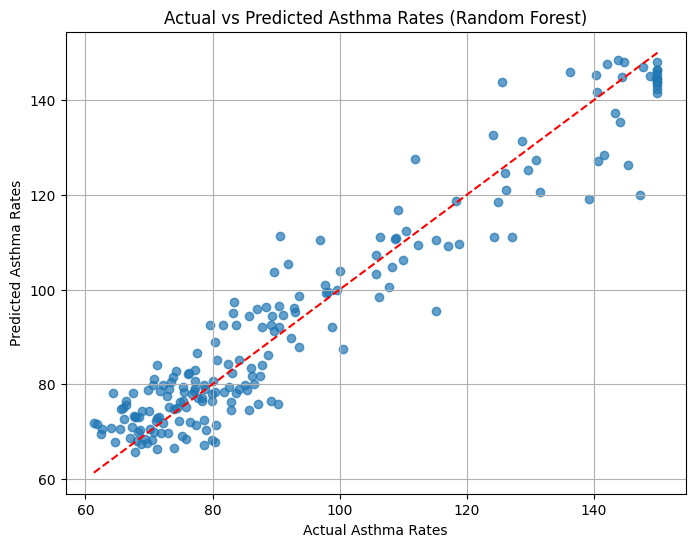

In [ ]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.7)
plt.title('Actual vs Predicted Asthma Rates (Random Forest)')
plt.xlabel('Actual Asthma Rates')
plt.ylabel('Predicted Asthma Rates')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.show()
